#프롤로그  - 실험실에서의 첫째 날

*당신은 대학원에 진학하여 료코 박사의 연구실에서 첫날을 맞이하게 되었습니다.<br/>
약속한 시간에 료코 박사의 연구실에 도착한 당신은, 빈 방에서 박사님을 기다리고 있습니다.*


*박사님이 오길 기다리며 연구실 안을 둘러보고 있는데<br/>
갑자기! 근처의 모니터가 켜지는 것이 아니겠습니까?*<br/> 

*모니터에 비췬 것은 료코 박사님이었습니다.* <br/> 
*료코 박사는 일본 전통 의상을 입고 있었습니다.*


*료코 박사님은 당신에게 짧게 인사를 하면서 본인이 지금 다른 연구소에 와 있다고 합니다.* <br/> 
*그리고 아주 중요한 실험 데이터를 모으기 위해서 당분간 그곳을 떠날 수 없다고 설명하며*<br/> 
*돌아올 때 까지 웹에서 틈틈이 소통하자고 합니다.*<br/> 

*또한 본인이 돌아올 때까지 당신이 스스로 연구를 진행해 달라고 합니다....*


[<< 이곳을 클릭하여 료코 박사와 웹캠으로 대화를 나누어 봅시다 >>](https://youtu.be/eLw7fWb2xv4)

# Week1-A: 양자 회로로 덧셈기 구현하기

안녕하세요! 우리 연구실에 오신 것을 환영합니다. 이번 주에서는 먼저 양자회로를 이용하여 단순한 고전계산(가산)을 실시합니다.

다양한 논리게이트(AND, OR, XOR 등)를 조합해 고전적으로 덧셈기를 작성할 수 있는 것과 마찬가지로 양자회로에서도 덧셈기를 만들 수 있습니다.

연습을 시작하기 전에 아래의 첫 번째 셀을 클릭하고 shift+enter를 눌러 실행시킵시다. 이것은 Jupyter Notebook 환경에서 코드 셀을 실행하는 일반적인 방법입니다. 실행 중에는 해당 셀의 왼쪽 상단에 [*]이 표시됩니다. 실행이 종료되면 실행한 셀의 수를 나타내는 별 대신 숫자가 표시됩니다. Jupyter Notebook에 대한 자세한 내용은 Qiskit Textbook의 이 장을 참조하십시오: https://qiskit.org/textbook/ch-prerequisites/python-and-jupyter-notebooks.html.

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# If you run this code outside IBM Quantum Experience,
# run the following commands to store your API token locally.
# Please refer https://qiskit.org/documentation/install.html#access-ibm-quantum-systems
# IBMQ.save_account('MY_API_TOKEN')

# Loading your IBM Q account(s)
IBMQ.load_account()

//anaconda3/envs/qiskit023_2/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 양자 회로란 무엇일까요?
양자 회로는, 양자 계산의 과정을 기술하는 방법의 하나로, 기본적인 조작을 실시하는 양자 게이트를 조합해 구성됩니다.먼저 몇 가지 주요 양자 게이트를 소개하겠습니다.

### X 게이트
X 게이트는 블로흐 구면에서 큐비트의 상태 벡터를 x축을 기준으로 $\pi$ 만큼 회전합니다.$|0\rangle$에 X 게이트를 적용하면 $|1\rangle$ 상태가 되고, $|1\rangle$ 상태에 X 게이트를 적용하면 $|0\rangle$ 상태가 되기 때문에 고전적인 NOT 게이트와 같은 조작을 실현할 수 있어 비트 플립이라고도 불립니다.
선형대수에 대해서 학습하고 싶은 분은 Qiskit Textbook의 이 장을 봐 주세요: https://qiskit.org/textbook/ch-appendix/linear_algebra.html.


$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

In [1]:
# Let's do an X-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

노트: Quantum Register를 생략하는 새로운 방식이 있지만, 위의 방식이 복잡한 양자 회로의 알고리즘을 이해하는 것이 더 쉽기 때문에 위의 구문을 사용했습니다. [여기](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit#qiskit.circuit.QuantumCircuit)에서 새로운 표기법을 볼 수 있습니다.

In [1]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

NameError: name 'Aer' is not defined

### H 게이트

Hadamard 게이트(하다마드 게이트)는 블로흐 구의 $x$ 축과 $z$ 축의 중간 축 둘레의 $\pi$ 회전입니다.
예를 들어 $|0\rangle$에 H 게이트를 적용하면 $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$와 같은 중첩 상태(측정하면 0 또는 1이 될 확률이 동일한 상태)를 만들 수 있습니다.이 상태는 $|+\rangle$로도 표기됩니다.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

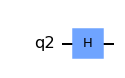

In [4]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

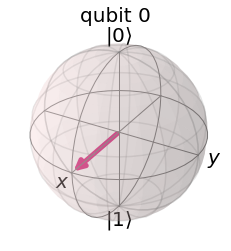

In [5]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Z 게이트
Z 게이트는 블로흐 공의 $z$ 축 주위의 $\pi$ 회전입니다.위상반전이라고도 불립니다.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

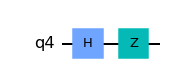

In [6]:
# Let's do an Z-gate on |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

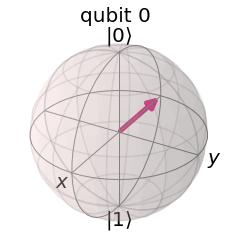

In [7]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### CX 게이트 (CNOT Gate)
CX 게이트는 제어 NOT 게이트, CNOT라고도 불립니다.CX 게이트는 2개의 양자 비트(제어 양자 비트와 타깃 양자 비트)를 입출력으로 가지며, 제어 양자 비트가 $|1\rangle$일 때 타깃 양자 비트에 대해 비트 반전(X 게이트)을 실시합니다.(Qiskit에서는 번호가 큰 양자 비트일수록 높은 자릿수의 비트에 대응합니다.즉, 오른쪽부터 순서대로 번호가 붙여집니다.)

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

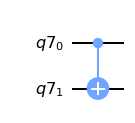

In [8]:
# Let's do an CX-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZ 게이트
CZ 게이트도 2개의 양자 비트(제어 양자 비트와 타깃 양자 비트라 부릅니다)를 입출력으로 가지며, 제어 양자 비트가 $|1\rangle $일 때 타깃 양자 비트에 대해 위상 반전(Z 게이트)을 실시합니다.  

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

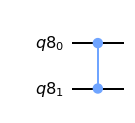

In [9]:
# Let's do an CZ-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

노트: CZ 게이트는 CX 게이트와 H 게이트로도 만들 수 있습니다.

In [2]:
# Let's make CZ-gate with CX-gate and H-gate
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

### CCX 게이트
CCX 게이트는 Toffoli 게이트라고도 부릅니다.

CCX 게이트는 3개의 양자 비트(2개의 제어 양자 비트와 1개의 타깃 양자 비트)를 입출력으로 가지며, 제어 양자 비트 2개가 모두 $|1\rangle$일 때, 타깃 양자 비트에 대해 비트반전(X게이트)을 실시합니다.(Qiskit에서는 오른쪽부터 순서대로 번호를 매기는 것을 주의해 주세요.)

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

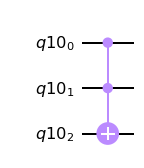

In [11]:
# Let's do an CCX-gate on |000>
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

그 외 양자 게이트에 대한 자세한 내용은 Qiskit Textbook의 [Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)를 참조해 주세요.

## 고전 논리 게이트를 양자 게이트로 작성해 봅시다.
자, 이제 고전의 논리 게이트를 양자 게이트로 만들어 봅시다. 진리표와 양자회로에 의한 표현을 다음 표에 있습니다.양자 레지스터를 q, 고전 레지스터를 c라 하고 측정 결과를 작성하는 양자 논리 게이트를 작성해 봅시다.

### NOT 게이트
위에서 설명한 것과 같이, X 게이트는 NOT 게이트와 같습니다. NOT 게이트의 진리표는 다음과 같습니다:

|input|output|
|--|--|
|0|1|
|1|0|

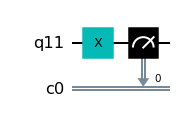

In [12]:
# Create a Quantum Circuit with 1 quantum register and 1 classical register
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])    # Map the quantum measurement to the classical bits
qc.draw(output='mpl')

### AND 게이트
AND 게이트의 진리표는 다음과 같습니다:

|A (input)|B (input)|output|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

CCX 게이트를 사용해서, 두개의 제어 비트를 사용하는 CCX게이트를 사용해서 AND 게이트는 다음의 회로로 구현할 수 있습니다.

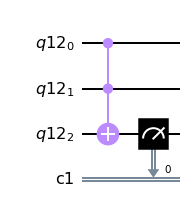

In [13]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NAND 게이트
NAND 게이트는 AND 게이트 적용 직후 NOT 게이트를 적용하여 구현합니다.

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

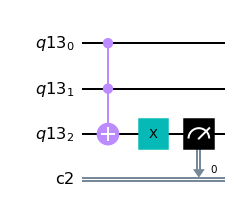

In [14]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### OR 게이트

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [3]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

### XOR 게이트
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [4]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

### NOR 게이트

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

In [5]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

# 가산기
가산기는 덧셈을 하는 논리회로입니다.

이번 시간에는 가장 간단한 가산기인 반가산기와 전가산기를 이용한 가산기에 관해 알아보겠습니다.

## 반 가산기
반가산기는 2진수 두 개를 받아서 가장 아래 자리값끼리 덧셈을 합니다. 1비트의 정보 2개(입력 A, B)가 입력으로서 주어지고 자리 올림값 출력(Carry out), 출력(Sum, 합) 2개를 출력으로 갖습니다. 이 자리 올림 출력의 정보는 뒤에서 서술할 모든 가산기 입력 중 하나로 한 자리 위의 값을 구하기 위해 사용됩니다.

반가산기는 아래와 같은 진리표의 논리회로로 나타낼 수 있습니다.

|A (input)|B (input)|S (sum)|C (carry out)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

이 진리값를 보면 자리올림 출력 C는 입력 A와 입력 B에 대해 AND를 적용한 것, 출력 S는 입력 A와 입력 B에 대해 XOR를 적용한 것임을 알 수 있습니다. AND와 XOR에 관해서는 이미 작성되었으므로 아래와 같이 조합하여 반가산기 양자회로를 생성할 수 있습니다.

양자 레지스터를 'q', 고전 레지스터 'c'라 하고, 입력 A, B를 q[0],q[1]에, 출력 S, 자리 올리기 출력 C,를 q[2],q[3]에 할당합니다. 또 출력 결과는 c1, c0 순으로 되어 있다는 점에 주의해 주십시오.

{'00': 1000}


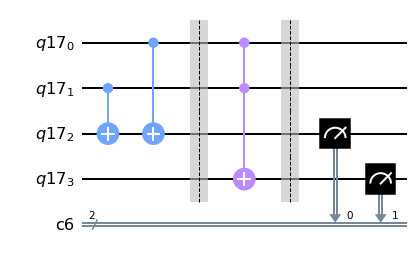

In [18]:
#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

## <span style="color: red; ">중요: Unroller를 이용한 양자비용 계산</span>
양자회로로 작성된 프로그램을 평가하는 기준 몇가지는 다음과 같습니다:

1. 양자 비트의 개수
2. 회로의 깊이
3. 프로그램 실행 속도 (Runtime)
4. 사용된 지시문(양자 게이트의 종류 및 각각의)의 개수

합니다. 이것들은 모두 양자 계산의 결과 및 스루풋 등에 영향을 주는 중요한 척도이며, 이번 Quantum Challenge에서는 특히 4번의 지표, 즉 사용된 게이트의 종류와 개수에 따라 다음과 같이 프로그램의 "비용"을 계산합니다. 

비용 = 단일 양자 비트게이트(ex: X 게이트)의 수 + CX 게이트의 수 × 10


임의의 양자 회로는 단일 양자 비트 게이트(1 양자 비트에 적용하는 게이트)와 2 양자 비트 게이트에 대한 게이트로 분해할 수 있습니다.현재의 노이즈가 많은 중규모 양자 디바이스(NISQ)에서는, CX게이트의 에러율은 일반적으로 단일 양자 비트 게이트의 10배입니다.따라서 비용에서는 CX 게이트의 가중치를 단일 양자 비트 게이트의 10배로 설정합니다.

unroller라고 불리는 프로그램을 이용하여 여러분도 각자가 작성하는 회로의 비용을 계산할 수 있습니다. 예를 들어 다음과 같은 양자회로가 있었다고 해봅시다.

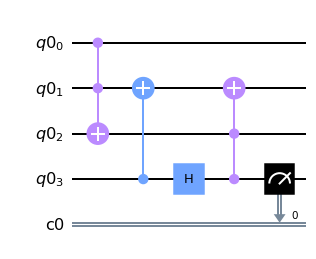

In [6]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [20]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

이 양자 회로에는 H 게이트, CX 게이트, CCX 게이트가 있습니다.qiskit.transpiler를 사용하여 Pass Manager를 Import함으로써 아래와 같이 Unroller에 의해 지정된 게이트로 분해할 수 있습니다.이 경우에는 u3게이트와 cx게이트로 분해합니다.

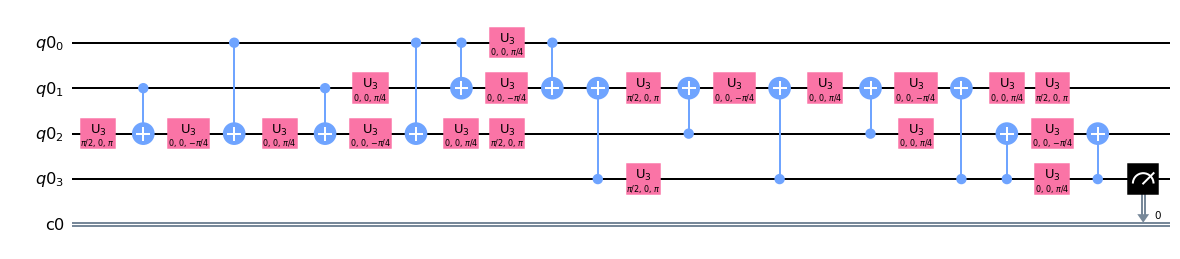

In [21]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [22]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

따라서 이 회로의 비용은

$19 + 13 \times 10 = 149$

로 계산됩니다.

단일 양자 비트게이트나 CX게이트 이외의 게이트가 Unroller에 의해 어떻게 분해되는지는 쉽게 확인할 수 있습니다. 아래의 예제에서 CCX 게이트를 u3 게이트와 CX 게이트로 분해해 봅시다.

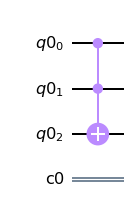

In [7]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

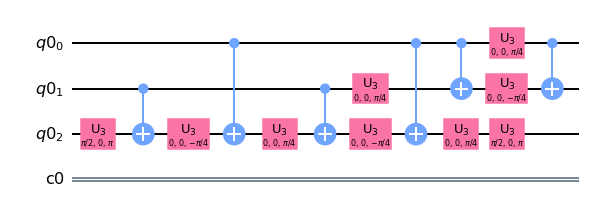

In [24]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [25]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

여기에서, CCX 게이트의 총 비용은 $9+6\times10=69$로 계산됩니다.

# 도전 과제 I-A
전 가산기는 두개의 바이너리 숫자와 1개의 Overflow 비트 (전 계산에서 올라온 자리올림 수, X)를 입력으로 받습니다.
다음의 입력 값에 대해 전 가산기를 만들어 봅시다:

$A=1$, $B=0$, $X=1$
. 

전가산기의 진리표는 다음과 같습니다.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

양자 레지스터를 'q'로, 고전 레지스터를 'c'로 선언하십시오. 입력 A, B, X는 각각 q[0], q[1], q[2]에 할당하십시오. 덧셈 결과 S는 c[0]에 Carry 출력 C는 c[1]에 저장하십시오.

{'0': 1000}


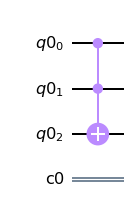

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### build your quantum circuit here

# execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

In [ ]:
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc)

In [ ]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex1a
submit_ex1a(qc)